# HW 4 - Tim Demetriades
## Keras - Fashion_Mnist
9/26/2021

In [1]:
!conda activate deeplearning

Below we create a model using the fashion_mnist dataset.

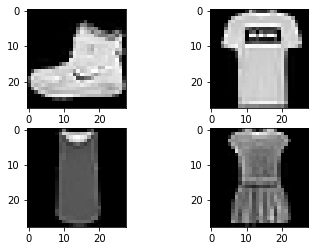

Epoch 1/10
300/300 - 2s - loss: 0.5172 - accuracy: 0.8206 - val_loss: 0.4443 - val_accuracy: 0.8438
Epoch 2/10
300/300 - 2s - loss: 0.3738 - accuracy: 0.8679 - val_loss: 0.3935 - val_accuracy: 0.8560
Epoch 3/10
300/300 - 1s - loss: 0.3350 - accuracy: 0.8787 - val_loss: 0.3812 - val_accuracy: 0.8607
Epoch 4/10
300/300 - 1s - loss: 0.3040 - accuracy: 0.8892 - val_loss: 0.3453 - val_accuracy: 0.8765
Epoch 5/10
300/300 - 1s - loss: 0.2826 - accuracy: 0.8964 - val_loss: 0.3542 - val_accuracy: 0.8727
Epoch 6/10
300/300 - 1s - loss: 0.2690 - accuracy: 0.9011 - val_loss: 0.3323 - val_accuracy: 0.8780
Epoch 7/10
300/300 - 1s - loss: 0.2546 - accuracy: 0.9068 - val_loss: 0.3401 - val_accuracy: 0.8783
Epoch 8/10
300/300 - 1s - loss: 0.2448 - accuracy: 0.9097 - val_loss: 0.3397 - val_accuracy: 0.8773
Epoch 9/10
300/300 - 1s - loss: 0.2315 - accuracy: 0.9153 - val_loss: 0.3237 - val_accuracy: 0.8860
Epoch 10/10
300/300 - 1s - loss: 0.2214 - accuracy: 0.9187 - val_loss: 0.3219 - val_accuracy: 0.8886

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
# load (downloaded if needed) the fashion_MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))